In [1]:
import numpy as np
import matplotlib.pyplot as plt
def lg_plot(clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs')
rnd_clf = RandomForestClassifier(n_estimators=100) # 随机森林 666
svm_clf = SVC(gamma=5, probability=True)

# 软投票
voting_clf = VotingClassifier(
                estimators=[('l', log_clf),('r', rnd_clf),('s', svm_clf)],
                voting='soft')


# 卫星数据
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.25, random_state=0)
X_train = X[:800]
y_train = y[:800]
X_test = X[:-200]
y_test = y[:-200]

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85625
RandomForestClassifier 1.0
SVC 0.94625
VotingClassifier 0.96


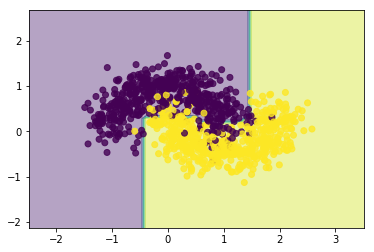

In [3]:
# DecisionTree with bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=100, bootstrap=True, n_jobs=-1,
            oob_score=True)

bag_clf.fit(X_train, y_train)
lg_plot(bag_clf)

In [4]:
y_pred = bag_clf.predict(X_test)

print(bag_clf.oob_score_)
print(accuracy_score(y_test, y_pred))
print(bag_clf.oob_decision_function_)

0.93875
0.945
[[0.07900677 0.92099323]
 [0.05504587 0.94495413]
 [0.73041475 0.26958525]
 ...
 [0.02477477 0.97522523]
 [0.99303944 0.00696056]
 [0.73502304 0.26497696]]
